Load existing (saved) VS state, results, and metrics

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import lab.torch as B
import torch
import os, sys
import pickle
import pandas as pd

/homes/mojb2/Thesis/GI-PVI/venv/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from varz import Vars, namespace
from wbml import experiment, out, plot
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

In [13]:
# experiment_name = "07-14-20.47.03_pvi-class-present"
# _exp_dir = f"/homes/mojb2/Thesis/GI-PVI/results/{experiment_name}/"

exp_n = "results/07-14-20.13.39_sync-pvi-10c-5i-500e-400n-20m-analytic-10clients-present"
exp_n = "results/07-22-09.06.31_seq-pvi-adult-1c-1g-2000l-0-8n-100m"
_exp_dir = f"/homes/mojb2/Thesis/GI-PVI/{exp_n}/"

In [8]:
from utils.review import latest_subdir
_exp_dir = latest_subdir()

In [14]:
_vs_state_dict = torch.load(_exp_dir + '/model/_vs.pt')
_vs_state_dict.keys()

dict_keys(['zs.client0_z', 'ts.client0_layer0_yz', 'ts.client0_layer0_nz', 'ts.client0_layer1_yz', 'ts.client0_layer1_nz', 'ts.client0_layer2_yz', 'ts.client0_layer2_nz'])

In [15]:
vs: Vars = Vars(torch.float64)

for idx, name in enumerate(_vs_state_dict.keys()):
    if name.__contains__("output_var") or \
        name.__contains__("nz"):

        vs.positive(_vs_state_dict[name], name=name)
    else:
        vs.unbounded(_vs_state_dict[name], name=name)

vs.print()

zs.client0_z:
    (100x108 array of data type float64)
    [[-1.381e-01 -5.429e-01  1.412e+00 ...  1.038e+00  5.465e-02  1.035e-01]
     [-5.316e-01  1.040e+00  1.104e+00 ...  1.348e+00 -2.908e-01 -1.180e-01]
     [ 3.772e-01  3.472e-01 -4.207e+00 ...  7.049e-01 -1.815e-01 -2.048e-02]
     ...
     [-1.031e+00  4.092e+00  1.215e+00 ...  4.654e+00  2.231e-01  1.738e-03]
     [-4.764e-01 -1.870e-01 -6.177e-01 ...  2.094e-01  8.010e-02 -1.782e-01]
     [ 1.844e-01  2.883e-01 -3.186e+00 ...  2.834e+00 -1.922e-01 -3.250e-01]]
ts.client0_layer0_yz:
    (100x50 array of data type float64)
    [[ 1.923  1.803  1.609 ... -0.898 -2.378 -2.765]
     [-0.629  1.926  2.005 ... -2.045  1.539  0.099]
     [-2.303 -0.127 -0.077 ... -1.418  0.058  0.074]
     ...
     [ 0.278  3.791 -0.899 ... -0.43   1.56   0.795]
     [ 0.844 -0.17   0.81  ...  0.676 -1.563  0.641]
     [-1.47   0.19   1.132 ... -2.29  -0.45   0.213]]
ts.client0_layer0_nz:
    (50x100 array of data type float64)
    [[1.482e-02 6.658

In [15]:
_vs_state_dict['ts.client0_layer1_nz']

tensor([[ 7.0306,  0.8276,  1.9872,  ...,  7.6907, -1.0912,  9.6272],
        [ 0.4374, -0.0632,  3.7936,  ..., -0.0864,  4.1394, 10.2988],
        [ 0.5280,  1.7193,  2.5917,  ...,  2.3037,  6.4709,  9.8093],
        ...,
        [14.6137,  6.9315,  9.5327,  ..., 17.2114,  5.8873, 30.2340],
        [ 6.0707,  1.2877,  2.3663,  ...,  6.1997,  3.0969,  7.4359],
        [10.7130,  4.6072, 11.6179,  ..., 15.3329, 13.9802, 28.7243]],
       device='cuda:0', requires_grad=True)

In [10]:
vs['ts.client0_layer1_nz']

tensor([[ 7.0306,  0.8276,  1.9872,  ...,  7.6907,     nan,  9.6272],
        [ 0.4374,     nan,  3.7936,  ...,     nan,  4.1394, 10.2988],
        [ 0.5280,  1.7193,  2.5917,  ...,  2.3037,  6.4709,  9.8093],
        ...,
        [14.6137,  6.9315,  9.5327,  ..., 17.2114,  5.8873, 30.2340],
        [ 6.0707,  1.2877,  2.3663,  ...,  6.1997,  3.0969,  7.4359],
        [10.7130,  4.6072, 11.6179,  ..., 15.3329, 13.9802, 28.7243]],
       device='cuda:0', dtype=torch.float64, grad_fn=<ExpBackward0>)

In [4]:
pd.read_csv(_exp_dir+"/metrics/server_log.csv", index_col=0)

,train_mll,train_acc,test_mll,test_acc
iteration,,,,
0,-2.275095,0.242483,-2.274186,0.2468
1,-0.587516,0.865717,-0.565924,0.8720
2,-0.477612,0.890583,-0.455922,0.8972
3,-0.437449,0.894833,-0.420010,0.9002
4,-0.408486,0.902367,-0.398197,0.9047
5,-0.370016,0.910200,-0.353391,0.9150
6,-0.351272,0.913317,-0.339474,0.9176
7,-0.362480,0.912100,-0.346549,0.9177
8,-0.328072,0.918317,-0.314869,0.9235


In [92]:
eval_all = pd.read_csv(_exp_dir+"/model/eval_all.csv")

y_pred = eval_all['preds_0']
x, y = eval_all['x_eval'], eval_all['y_eval']

In [115]:
eval_all.loc[:,eval_all.columns.str.startswith('preds')]

,preds_0,preds_1,preds_2,preds_3,preds_4,preds_5,preds_6,preds_7,preds_8,preds_9
0,2.059990,0.399058,0.217011,0.603867,0.736127,0.499647,0.550682,0.087668,1.712231,-0.180364
1,2.044758,0.290843,0.217011,1.108557,0.736127,0.499647,0.852704,0.087668,1.712231,-0.180364
2,2.165924,0.399058,0.217011,0.020202,0.442697,-0.119626,-0.075902,0.057520,1.712231,-0.180364
3,-0.364233,-0.792416,0.174738,-2.195668,-2.743486,-2.258039,-2.091673,0.087668,-0.240627,-0.180364
4,2.257727,0.399058,0.217011,0.020202,0.230976,0.483416,-0.257205,-0.072809,0.924884,-0.203344
...,...,...,...,...,...,...,...,...,...,...
995,2.257399,0.399058,0.217011,-0.587852,0.247868,0.499647,-0.257205,-0.166552,-0.316398,-0.180364
996,2.252124,0.399058,0.217011,-0.962433,0.288781,0.499647,-0.257205,-0.210903,-0.640993,-0.180364
997,1.954223,0.399058,0.217011,-1.287063,0.337003,0.499647,-0.257205,-0.171422,-1.010228,-0.180364
998,0.911823,-0.061779,0.217011,-1.767127,-1.724604,0.499647,-0.834666,0.004540,-1.069407,-0.180364


In [100]:
eval_all.loc[0]

x_eval         3.044162
y_eval         1.138349
pred_errors    0.469757
pred_var       0.490126
y_pred_mean    0.668592
preds_0        2.059990
preds_1        0.399058
preds_2        0.217011
preds_3        0.603867
preds_4        0.736127
preds_5        0.499647
preds_6        0.550682
preds_7        0.087668
preds_8        1.712231
preds_9       -0.180364
Name: 0, dtype: float64

In [101]:
y_pred

0      0.668592
1      0.736918
2      0.463875
3     -1.060410
4      0.399992
         ...   
995    0.211261
996    0.140472
997    0.050066
998   -0.400493
999   -0.320880
Length: 1000, dtype: float64

In [63]:
row0 = eval_all.loc[0]

In [70]:
row0[-9:].var()

11.839531654415293

In [69]:
row0[-9:].mean()

0.370028661187972

In [68]:
eval = pd.read_csv(_exp_dir+"model/eval_test.csv")

In [106]:
x_te, y_te = eval['x_test'], eval['y_test']

_preds_idx = [f'preds_{i}' for i in range(10)]
y_preds = eval[_preds_idx].mean(1)

quartiles = np.quantile(eval[_preds_idx], np.array((0.05,0.25,0.75,0.95)), axis=1) # [num quartiles x num preds]


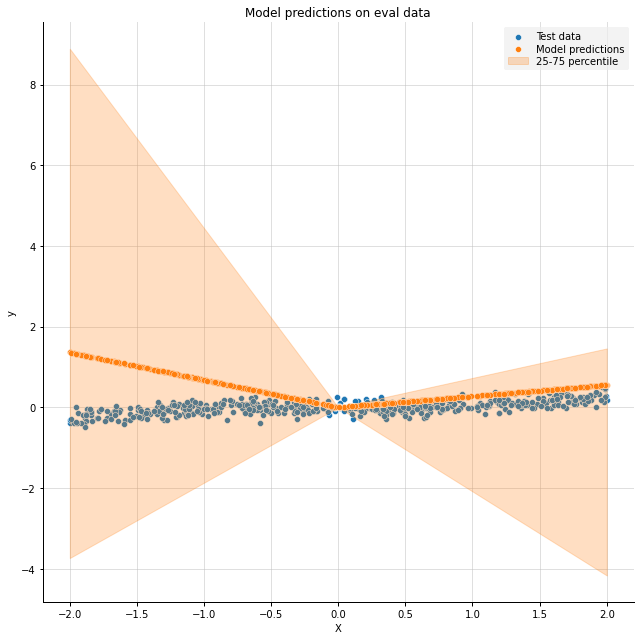

In [114]:
fig, ax = plt.subplots(1, 1, figsize=(9,9))

sns.scatterplot(y=y_te, x=x_te, label="Test data", ax=ax, 
            color=colors[0])

sns.scatterplot(y=y_preds, x=x_te, label="Model predictions", ax=ax, 
            color=colors[1])

ax.legend()
# ax.set_xlabel(f'{}')
# ax.set(ylim=(0.60, 1.01), xlim=(-0.005, 0.20))
ax.set_xlabel("X")
ax.set_ylabel("y")
ax.set_title("Model predictions on eval data")
ax.legend(loc='upper right', prop={'size': 12})

x_te_sorted, q1, q2 = zip(*sorted(zip(x_te, quartiles[1, :], quartiles[2, :])))
ax.fill_between(x_te_sorted, q1, q2, color='tab:orange', alpha=0.25, label="25-75 percentile")

plot.tweak(ax)